# Lab 2: Rgression
# Part 1: Simple Linear Regression

## Goals

The main goals of this labs is:
* Hands on python machine learning and data sciences packages (numpy, pandas, sklearn and matplotlib)
* Master of simple linear regression algorithms practice.

## 1. Data Pre-processing

### 1.1. Importing and loading the Dataset

Importing data from external data source
In our case we are working with the **house-prices.csv** file.
importer le module pandas qui va nous aider au traitement des données

In [1]:
import pandas as pd

We specify the data source file url (from online source) or path, I recommand using absolute path rater than relative path to prevent FileNotFound Error, or just put the file under the same repository as the python script, and the file_url will be just "house-prices.csv"

In [2]:
file_url = "house-prices.csv"

We're now ready to import the CSV file into Python using read_csv() from pandas, with pandas you can read data from different source (csv, json, sql, xls/xlsx, ...) for more details you can see official pandas documentation

In [3]:
dataset = pd.read_csv(file_url)

We can now see our dataset table

In [4]:
# calling the head() function without passing an argument will return first 5 rows
# you can specify the number of rows in the head() method
# dataset.head(8)
dataset.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


### 1.2. Extracting "SqFT" and "Price" columns

Extract *size* and *real_regression* data from respectively **SqFt** and **Price** columns. 

In [5]:
size = dataset[['SqFt']]
size # -> to see SqFt content

,SqFt
0,1790
1,2030
2,1740
3,1980
4,2130
...,...
123,1900
124,2160
125,2070
126,2020


In [6]:
price = dataset[['Price']]
price # -> to see Price content

,Price
0,114300
1,114200
2,114800
3,94700
4,119800
...,...
123,119700
124,147900
125,113500
126,149900


Verifiying price and size vectors dimensions, then reshaping it (tranform from row vector to column vector).

In [7]:
import numpy as np

X = np.array(size).reshape(-1,1)
Y = np.array(price).reshape(-1,1)

# print(X)
# print(Y) 

## 2. Linear Regression

No we can use sklearn package to import *LinearRegression* from the linear_model module to create our linear regression model having the equation Y = a.X + b

In [8]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# fit (train) the model
model.fit(X, Y)

/home/naiim-khaskhoussi/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


LinearRegression()

From this model we can now get the a and b coefficients.

In [9]:
a = model.coef_[0][0]
b = model.intercept_[0]
print("a = ", a)
print("b = ", b)

a =  70.22631824288523
b =  -10091.129909123149


In [10]:
y_pred = model.predict(X)

You can see difference between the real prices vector Y, and the predicted prices vector y_pred.

In [12]:
for index in range(0, 5):
    print('For y = {}, \ty_pred = {}'.format(Y[[index]], y_pred[[index]]))

For y = [[114300]], 	y_pred = [[115613.97974564]]
For y = [[114200]], 	y_pred = [[132468.29612393]]
For y = [[114800]], 	y_pred = [[112102.6638335]]
For y = [[94700]], 	y_pred = [[128956.98021179]]
For y = [[119800]], 	y_pred = [[139490.92794822]]


#### Graphical model predictions evaluation

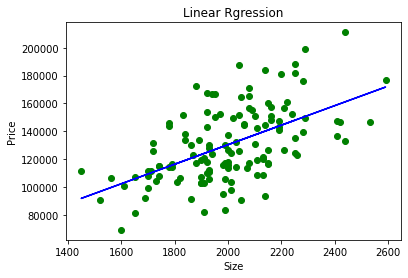

In [14]:
import matplotlib.pyplot as plt

# plot the points
plt.scatter(X, Y, color="green")

# plot the line with Y = a.X + b
plt.plot(X, y_pred, color="blue")

# setting up plot title, x and y labels
plt.title('Linear Rgression')
plt.xlabel('Size')
plt.ylabel('Price')

# show the plot
plt.show()

Using this model, you can predict a **price** for a given **size**

In [15]:
# predict the price of house with size 1700 
model.predict([[1700]])

array([[109293.61110378]])

In [16]:
# it's from
a * 1700 + b

109293.61110378173

#### Mean Squred Error

In [17]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(Y, y_pred)
math.sqrt(mse)

22299.25223701427

This value can not give a clear indicator for our model perfermance. we still need to compare this value to min, max and Y mean values.

In [18]:
# create a DataFrame from Y numpy array
ydf = pd.DataFrame(Y)

# use the describe() function to get mean, min, max and others details
ydf.describe()

,0
count,128.000000
mean,130427.343750
std,26868.770371
min,69100.000000
25%,111325.000000
50%,125950.000000
75%,148250.000000
max,211200.000000


#### Using r2_score 

In [19]:
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.3057893605816919

This model r2_score near 0, that's mean that this model is not well performance.